<div style="text-align: center; font-family: 'Trebuchet MS', Arial, sans-serif; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0">
  TOPIC: ANALYSIS ON SPOTIFY MUSIC DATASET
</div>

### TABLE OF CONTENT:
- [IMPORT LIBRARY](#IMPORT-LIBRARY)
- [EXPLORATORY DATA ANALYSIS](#EXPLORATORY-DATA-ANALYSIS)
- [PREPROCESSING](#PREPROCESSING)
- [QUESTION:-The-data-set-is-collected-mainly-from-many-Top-100-songs-in-the-years-2021,2022,2023,...-Let-see-how-frequently-the-artist-appeared-in-this-dataset?](#QUESTION:-The-data-set-is-collected-mainly-from-many-Top-100-songs-in-the-years-2021,2022,2023,...-Let-see-how-frequently-the-artist-appeared-in-this-dataset?)
- [QUESTION: There is a fields call popularity in the dataset. What are the features of songs that has least populartiry? What are the features of songs that has most populartiry? Are there any correlation between elements in these songs?](#QUESTION:-There-is-a-fields-call-popularity-in-the-dataset.-What-are-the-features-of-songs-that-has-least-populartiry?-What-are-the-features-of-songs-that-has-most-populartiry?-Are-there-any-correlation-between-elements-in-these-songs?)
- [QUESTION : WHO ARE THE ARTIST THAT HAS THE MOST CONTRIBUTIONS IN EACH YEARS?](#QUESTION-:-WHO-ARE-THE-ARTIST-THAT-HAS-THE-MOST-CONTRIBUTIONS-IN-EACH-YEARS?)
- [QUESTION: WHICH MONTH IS BEST FOR A NEW SONG RELEASE?](#QUESTION:-WHICH-MONTH-IS-BEST-FOR-A-NEW-SONG-RELEASE?)
- [QUESTION: WHICH ARE SONGS WHICH HAVE SAME/NEARLY MELODY WITH A SONG?](#QUESTION:-WHICH-ARE-SONGS-WHICH-HAVE-SAME/NEARLY-MELODY-WITH-A-SONG?)

### IMPORT LIBRARY

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install missingno
#!pip install wordcloud==1.6.0 
import missingno as msno
import re

In [3]:
import sys
import warnings
print(sys.executable)

#read files
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\python.exe


### EXPLORATORY DATA ANALYSIS

### Read data from file

In [4]:
df = pd.read_csv("../data/raw_spotify.csv")
df.head(5)

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,You Need To Calm Down,Lover,Taylor Swift,2019-08-23,171360,84,0.771,0.00929,0.771,0.671,0.000000,0.0637,-5.617,0.0553,85.026,4
1,"thank u, next","thank u, next",Ariana Grande,2019-02-08,207320,82,0.717,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4
2,EARFQUAKE,IGOR,"Tyler, The Creator",2019-05-17,190066,82,0.554,0.23000,0.554,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4
3,Lose You To Love Me,Rare,Selena Gomez,2020-01-10,206458,82,0.488,0.55600,0.488,0.343,0.000000,0.2100,-8.985,0.0436,102.819,4
4,High Hopes,Pray for the Wicked,Panic! At The Disco,2018-06-22,190946,82,0.579,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,82.014,4


<p align="center" style="font-size:20px;">
  <strong>MEANING OF EACH COLUMNS IN THE DATASET</strong>
</p>



| Column Name | Description |
|-------------|-------------|
| name | The title of the track. |
| album | The album to which the track belongs. |
| artist | The artist or artists who performed the track. |
| release_date | The date when the track was released. |
| length | The duration of the track in milliseconds. |
| popularity | The popularity of the track, measured on a scale from 0 to 100, where 100 is the most popular. |
| danceability | How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. The value ranges from 0 to 1, with 1 being the most danceable. |
| acousticness | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| energy | A perceptual measure of intensity and activity of a track, typically energetic tracks feel fast, loud, and noisy. The value ranges from 0.0 to 1.0. |
| instrumentalness` | Predicts whether a track contains no vocals. The value ranges from 0.0 to 1.0, with 1.0 representing a higher likelihood that the track is instrumental. |
| liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. |
| loudness | The overall loudness of the track in decibels (dB). The values typically range between -60 and 0 dB. |
| speechiness | Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audiobook, poetry), the closer to 1.0 the attribute value. |
| tempo | The overall estimated tempo of a track in beats per minute (BPM). |
| time_signature | The estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |

<p align="center" style="font-size:15px;">
  <strong>How many rows and columns do we have?</strong>
</p>

In [5]:
df.shape

(3229, 16)

<p align="center" style="font-size:15px;">
  <strong>Datatype of each column:</strong>
</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3229 non-null   object 
 1   album             3229 non-null   object 
 2   artist            3229 non-null   object 
 3   release_date      3229 non-null   object 
 4   length            3229 non-null   int64  
 5   popularity        3229 non-null   int64  
 6   danceability      3229 non-null   float64
 7   acousticness      3229 non-null   float64
 8   danceability.1    3229 non-null   float64
 9   energy            3229 non-null   float64
 10  instrumentalness  3229 non-null   float64
 11  liveness          3229 non-null   float64
 12  loudness          3229 non-null   float64
 13  speechiness       3229 non-null   float64
 14  tempo             3229 non-null   float64
 15  time_signature    3229 non-null   int64  
dtypes: float64(9), int64(3), object(4)
memory 

### PREPROCESSING

<p align="center" style="font-size:15px;">
  <strong>Are there any duplicates here?</strong>
</p>

In [7]:
 df.duplicated().sum()

437

**Duplicate sample** exists here beacause data is collected from various playlists.Therefore, a song can appear some times. All we need to do is dropping them.

In [8]:
df = df.drop_duplicates()
pd.isnull(df).sum()

name                0
album               0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
danceability.1      0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

<p align="center" style="font-size:15px;">
  <strong>Take a closer look at the dataset</strong>
</p>

**NaN handling and Convert datatype** : Due to no NULL value, and datatype is proper so this activity is free.

Text(0.5, 1.0, 'Correlation matrix between elements of the Song')

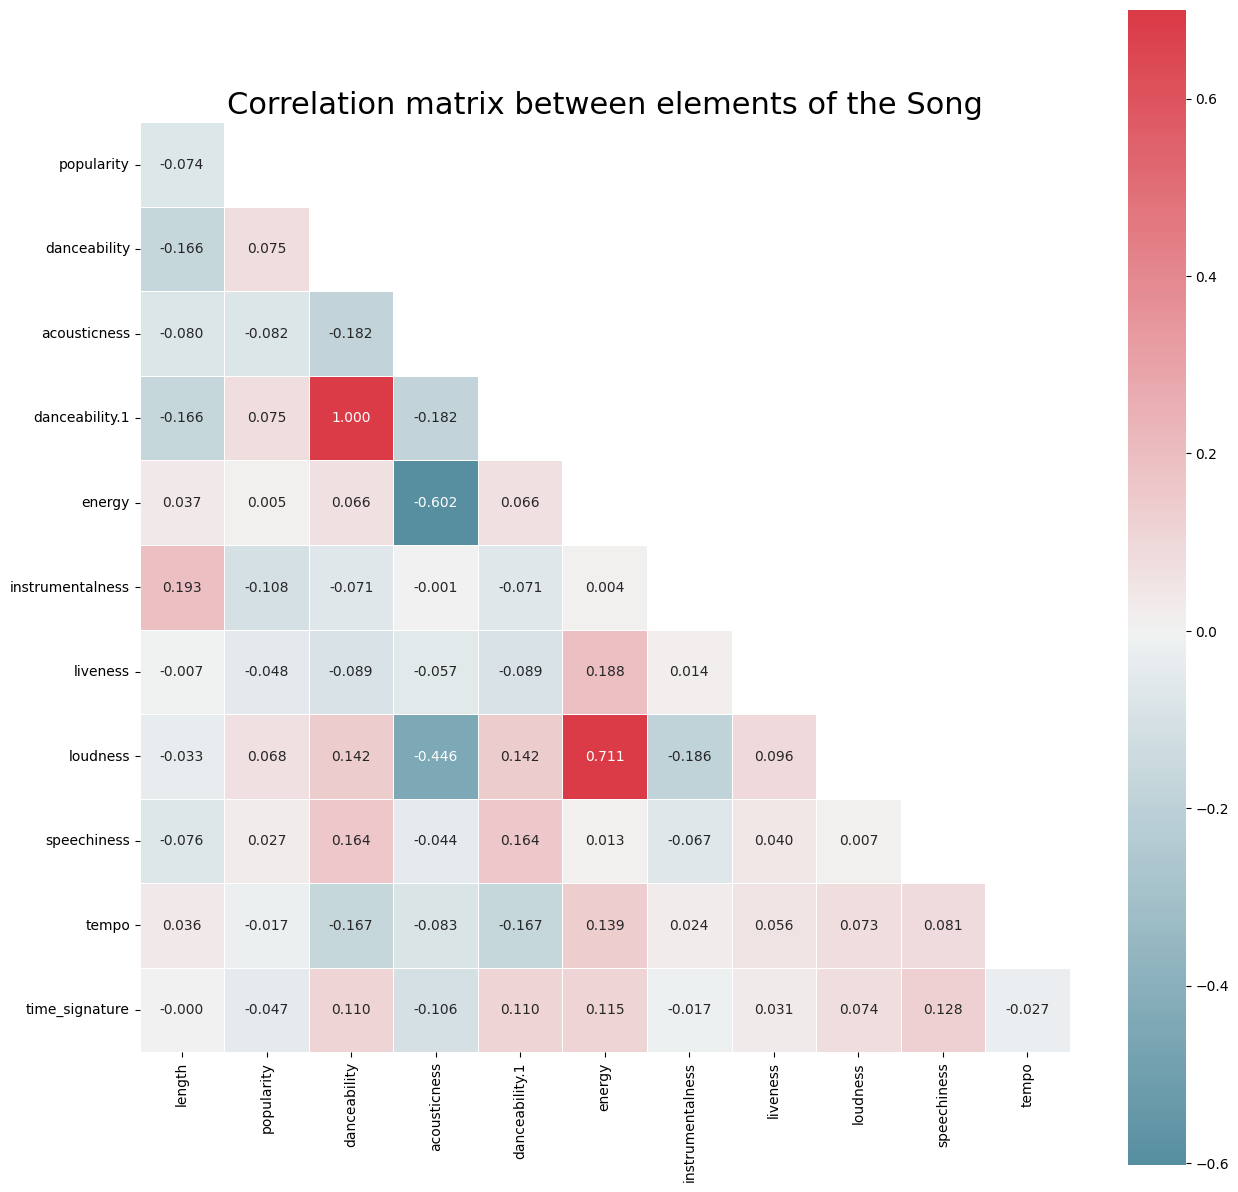

In [9]:
#Select value from corr matrix
df_chart = df.select_dtypes(include = ['int64','float64'])
corr = df_chart.corr()
mask = np.zeros_like(corr, dtype= 'bool')
mask[np.triu_indices_from(mask)] = True
adjust_corr = corr.iloc[1:,:-1]
mask = mask[1:,:-1]

# chart
fig , ax = plt.subplots(1,1,figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(adjust_corr, mask=mask, vmax=.7, center=0,cmap = cmap ,square=True, linewidths=.5, annot = True, fmt='.3f' )
ax.set_title("Correlation matrix between elements of the Song", loc = "center", fontsize = 22)


**INFORMATION GIVEN BY CHART**

This chart shows the correlation matrix between elements of a song. Here are my analyses based on the chart:

- The chart measures how strongly each element of a song is related to another element. A positive correlation means that the elements tend to increase or decrease together, while a negative correlation means that the elements tend to move in opposite directions. A correlation close to zero means that the elements have no linear relationship.
  
- The chart shows that **energy** and **loudness** have the highest correlation (0.711) , which means that songs with higher energy tend to have higher loudness, and vice versa. This makes sense, as energy is a measure of intensity and activity in a song, and loudness is a measure of the sound pressure level of a song.
- The chart shows **energy** - **acouticness** have the lowest correlation (-0.602), which means that songs with high energyrity do not necessarily have high acousticness, and vice versa.

- Based on the correlation matrix, we can see that there is a **moderate negative correlation** between **acoutisness** and **loudness**. This means that songs with high loud levels tend to be less in **acouticness**. 

- The **other correlation** seems to quite faint to be brought under consideration.

  
**MOREOVER** : I found that two fields **danceability.1** and **danceability** have abnormal relationship. Let's find what happened?

In [10]:
res = df['danceability.1'] != df.danceability
res.sum()

0

**RESULT** : Due to no diffence between the 2 columns. I will drop column ['danceability.1']

In [11]:
df = df.drop(columns = ['danceability.1'],axis = 1)
df.head(5)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,You Need To Calm Down,Lover,Taylor Swift,2019-08-23,171360,84,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,85.026,4
1,"thank u, next","thank u, next",Ariana Grande,2019-02-08,207320,82,0.717,0.22900,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4
2,EARFQUAKE,IGOR,"Tyler, The Creator",2019-05-17,190066,82,0.554,0.23000,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4
3,Lose You To Love Me,Rare,Selena Gomez,2020-01-10,206458,82,0.488,0.55600,0.343,0.000000,0.2100,-8.985,0.0436,102.819,4
4,High Hopes,Pray for the Wicked,Panic! At The Disco,2018-06-22,190946,82,0.579,0.19300,0.904,0.000000,0.0640,-2.729,0.0618,82.014,4


**SAVE DATA**: From here, we can claim that this dataset is good enough for later on process. And I will save a file of processed data in order to build model later.

In [12]:
df.to_csv("../data/clean_data.csv",index = False)

### EXPLORATORY DATA ANALYSIS

### QUESTION: The data set is collected mainly from many Top 100 songs in the years 2021,2022,2023,... Let see how frequently the artist appeared in this dataset?

<p align="center" style="font-size:15px;">
  <strong>Why we need to answer this question?</strong>
</p>

This is a way of exploring the distribution of the data, which is an important aspect of data analysis. By answering this question, we can learn about the variability and skewness of the data, which can affect the interpretation and validity of the results. For example, if the data is highly skewed towards a few artists, it may not be representative of the general population of music listeners. If there are outliers, such as artists who appear only once or twice in the dataset, they may have a disproportionate influence on the statistical measures, such as the mean or the standard deviation. Therefore, answering this question can help us to understand the characteristics and limitations of the data, and to choose appropriate methods and techniques for further analysis.

<p align="center" style="font-size:15px;">
  <strong>How to answer this question?</strong>
</p> Draw a bar chart with x-axis is the artist and y-axis is the number of song they have.

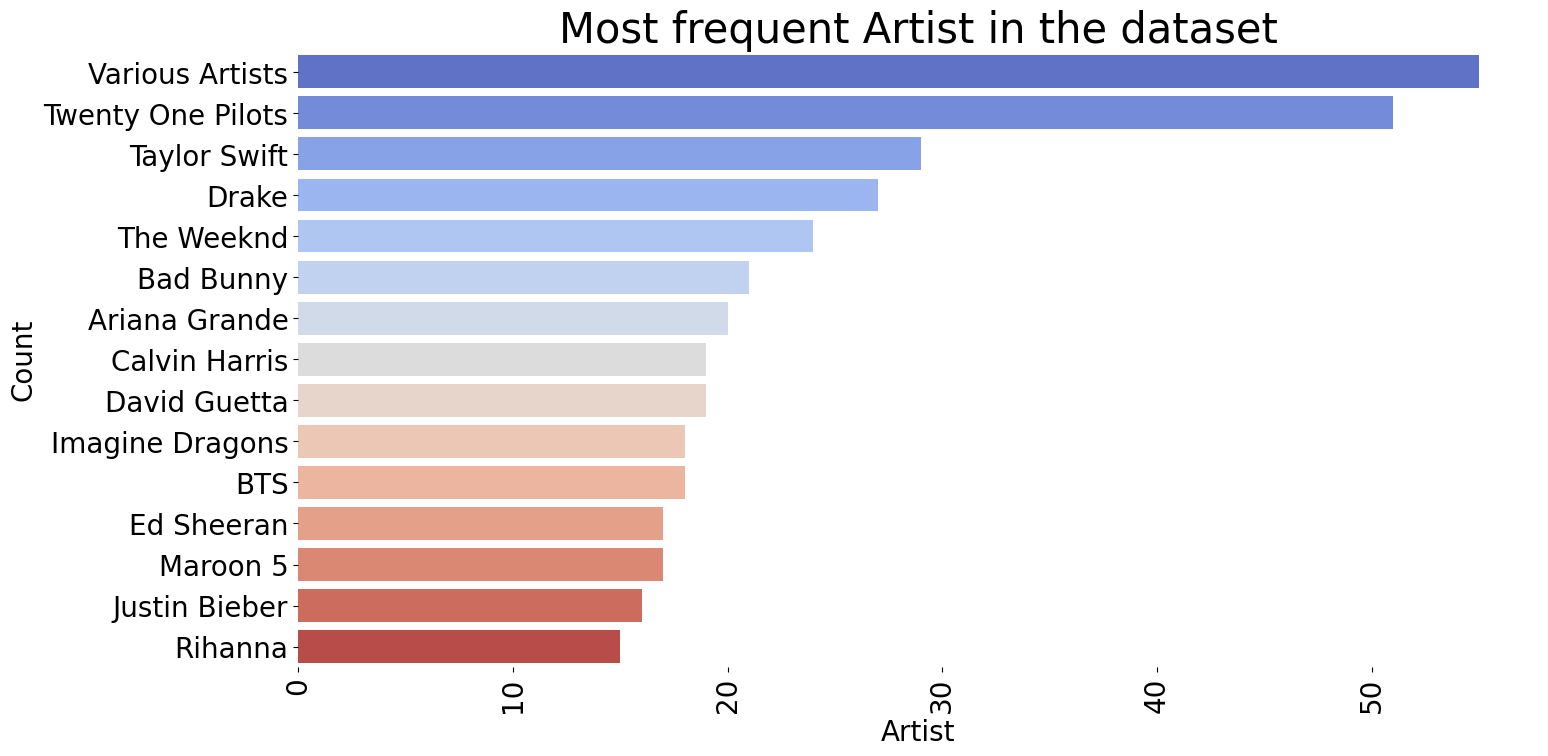

In [13]:
warnings.filterwarnings('ignore')
#visualize
plt.figure(figsize=(16,8))
plt.title('Most frequent Artist in the dataset',fontsize=30)
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Count', fontsize=20)

sns.countplot(df.artist, order=pd.value_counts(df.artist).iloc[:15].index, palette=sns.color_palette("coolwarm", 15) )
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

**INFORMATION GIVEN BY CHART**

This chart shows the most frequent artists in a dataset. Here are my comments based on the chart:

The chart suggests that the dataset contains songs from different genres, such as pop, rock, rap, and electronic. The artists have different styles and appeal to different audiences.

The chart indicates that **Twenty One Pilots** is the most popular artist in the dataset, with a count of nearly 50 songs. This could mean that the dataset was collected from a source that favors this artist, such as a fan playlist. Alternatively, it could mean that Twenty One Pilots has a large and loyal fan base that listens to their songs frequently.

The chart reveals that **Rihanna** is the least frequent artist in the Top 15, with a count of nearly 15. This could mean that the dataset was collected from a source that does not favour this artist much. Alternatively, it could mean that she has a low demand or a declining popularity among the listeners of the dataset. The second hypothesis is more likely to be true, beacause we all know that It's a long time since her last song has been released.

The chart shows that there is a gap between the top four artists **(Twenty One Pilots, Taylor Swift, Drake and The Weeknd)** and the rest of the artists. This could mean that the dataset has a skewed distribution, where a few artists dominate the majority of the songs. This could also reflect the current trends and preferences of the music industry and the listeners.

### QUESTION: There is a fields call popularity in the dataset. What are the features of songs that has least populartiry? What are the features of songs that has most populartiry? Are there any correlation between elements in these songs?

<p align="center" style="font-size:15px;">
  <strong>Why we need to answer this question?</strong>
</p> This analysis can help us understand the characteristics and patterns of unpopular songs. For example, we can see which elements of a song are more or less important for popularity, such as danceability, energy, loudness, etc. We can also compare the unpopular songs with the popular songs and see what makes them different. This can help us improve our music taste, discover new songs, or even create our own songs.

<p align="center" style="font-size:15px;">
  <strong>How to answer this question?</strong>
</p>

- **Step 1**: Let's draw a chart and get some statistics on popularity value to see how they distribute and what value can be considered as low/ high popularity.
- **Step 2**: Extract low popularity songs and analysis them.
- **Step 3**: Extract high popularity songs and analysis them.
- **Step 4**: Summarize and solve these question.

**STEP 1**:

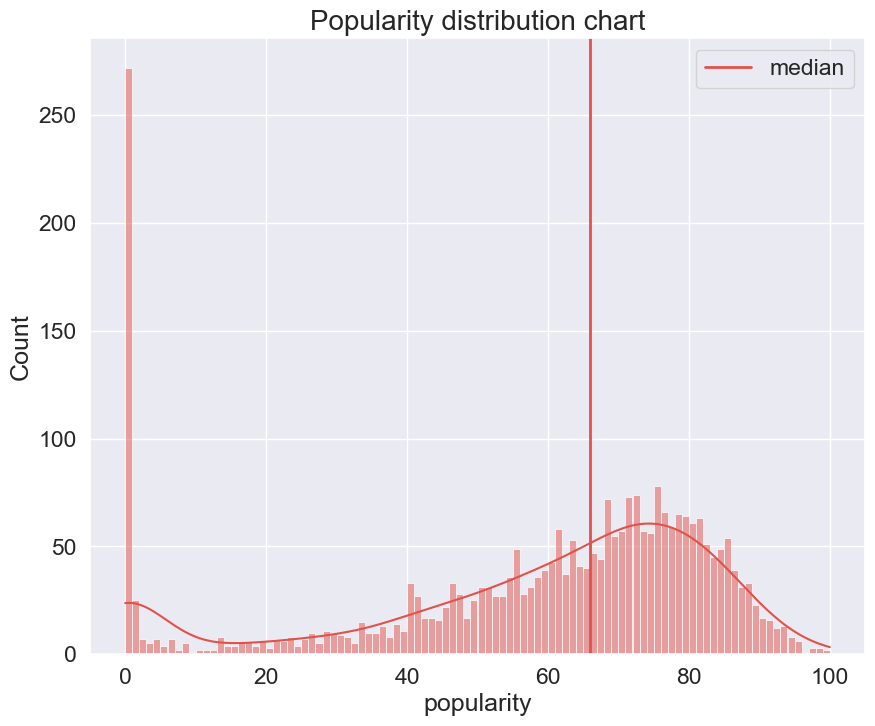

In [14]:
# Style
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

#Create
plt.figure(figsize = (10,8))
hist = sns.histplot(data=df, x="popularity", bins  = 100, kde = True)
plt.title("Popularity distribution chart", fontsize = 20)

important_vals = df.popularity.quantile([0.25,0.5,0.75]).to_list()
labels = ["25%","median", "75%"]

plt.axvline(important_vals[1], label = labels[1], linestyle='solid', linewidth=2)
plt.xticks()
plt.legend()
plt.show()


#### Comment: 
- This histogram chart show a left-skewed distribution of data, with most of value falled in the range (70,90)
- However, the mode of popularity value is 0.

In [15]:
df['popularity'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
popularity,2792.0,57.373926,26.604671,0.0,46.0,66.0,77.0,100.0


**COMMENT** : As we can see from above chart and statistics value. We can get less than 10 as threshold for unpopular song and more than 90 value for high popularity songs.

**STEP 2**:

In [16]:
least = df[df.popularity <= 10]
least.head(5)


,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
77,DNA,Love Yourself 結 'Answer',BTS,2018-08-24,223122,0,0.599,0.02230,0.774,0.000000,0.0669,-4.014,0.0541,129.819,4
100,Go Go,Love Yourself 承 'Her',BTS,2017-09-18,235779,0,0.856,0.17100,0.617,0.000000,0.0857,-5.308,0.0841,136.082,4
211,O.O,AD MARE,NMIXX,2022-02-22,172936,10,0.390,0.03540,0.767,0.000004,0.0601,-3.918,0.2930,200.263,4
273,달라달라 (DALLA DALLA),IT'z Different,ITZY,2019-02-12,199873,0,0.790,0.00116,0.853,0.000042,0.3290,-4.564,0.0665,124.998,4
286,FAKE LOVE,Love Yourself 結 'Answer',BTS,2018-08-24,242333,0,0.557,0.00267,0.719,0.000000,0.3060,-4.515,0.0372,77.501,4


In [17]:
least.shape

(337, 15)

Text(0.5, 1.0, 'Correlation matrix between elements of The Least Popular Song')

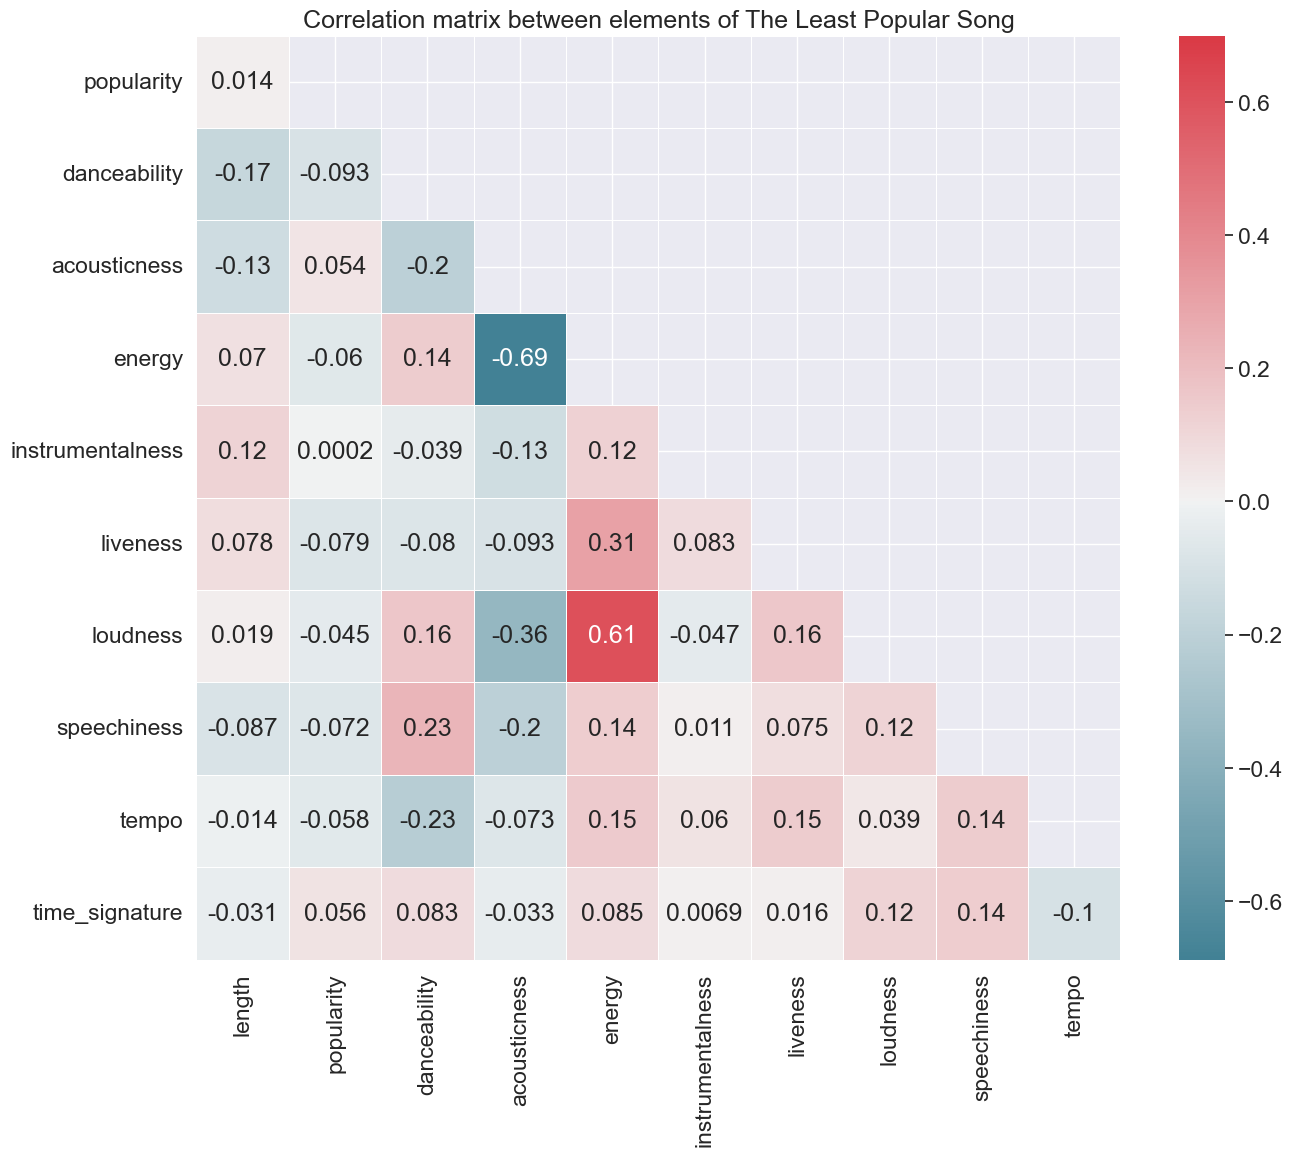

In [18]:
#Data
df_chart_2 = least.select_dtypes(include = ['int64','float64'])
df_chart_2 = df_chart_2.sort_values(by = ['popularity'],ascending = True).head(300)
corr = df_chart_2.corr()
#Style
mask = np.zeros_like(corr, dtype= 'bool')
mask[np.triu_indices_from(mask)] = True
adjust_corr = corr.iloc[1:,:-1]
mask = mask[1:,:-1]

## Create chart
fig , ax = plt.subplots(1,1,figsize=(15, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(adjust_corr, mask=mask, vmax=.7, center=0,cmap = cmap ,square=True, linewidths=.5, annot = True)
ax.set_title("Correlation matrix between elements of The Least Popular Song", loc = "center", fontsize = 18)

**INFORMATION GIVEN BY THE CHART**

- The main feature of this chart is that **energy** has a strong positive correlation with **loudness** (0.61), and a strong negative correlation with **acousticness** (-0.69). This suggests that the low popularity songs often have these features: higher energy, louder and have less acoustic elements. 

- The chart also shows that **danceability** has a slightly positive correlation with **energy** (0.14), **loudness**(0.16) and **speechness** (0.23), and a moderate negative correlation with **acousticness** (-0.2). This indicates that the songs with higher danceability are more energetic and have less acoustic and instrumental elements.

- Besides, there are also a moderate negative correlation between **loudness** and **accoutisness** (-0.36).



**STEP 3**

In [19]:
most = df[df.popularity >= 90]
most.shape

(81, 15)

In [20]:
most.tail(5)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
2682,Kill Bill,SOS,SZA,2022-12-08,153946,92,0.644,0.0521,0.735,0.144000,0.1610,-5.747,0.0391,88.980,4
2694,Super Shy,NewJeans 'Super Shy',NewJeans,2023-07-07,154666,90,0.776,0.1800,0.817,0.000034,0.1460,-6.018,0.0748,149.921,4
2697,Prada,Prada,cassö,2023-08-11,132359,94,0.638,0.0010,0.717,0.000002,0.1130,-5.804,0.0375,141.904,4
2706,Sprinter,Sprinter,Dave,2023-06-01,229133,91,0.916,0.1860,0.583,0.000000,0.0798,-8.067,0.2410,141.095,4
3022,Vois sur ton chemin - Techno Mix,Vois sur ton chemin (Techno Mix),BENNETT,2023-08-04,178156,90,0.634,0.0908,0.824,0.071100,0.1190,-3.394,0.0470,137.959,4


Text(0.5, 1.0, 'Correlation matrix between elements of The Most Popular Song')

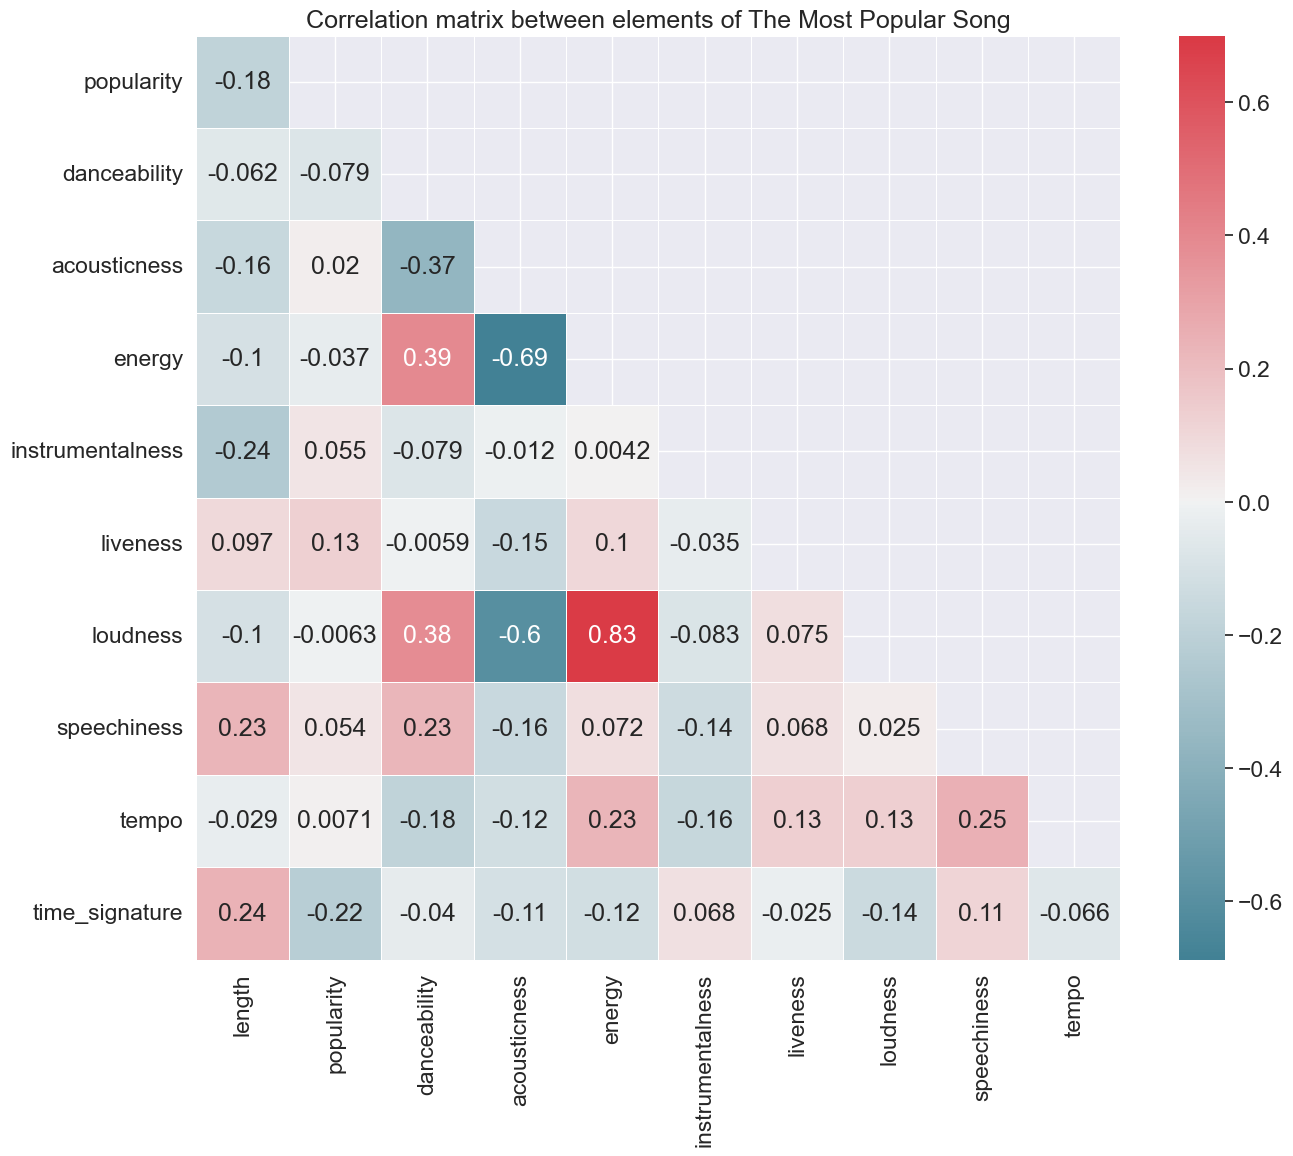

In [21]:

#Data
df_chart_3 = most.select_dtypes(include = ['int64','float64'])
corr = df_chart_3.corr()
mask = np.zeros_like(corr, dtype= 'bool')
mask[np.triu_indices_from(mask)] = True
adjust_corr = corr.iloc[1:,:-1]
mask = mask[1:,:-1]

#create chart
fig , ax = plt.subplots(1,1,figsize=(15, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(adjust_corr, mask=mask, vmax=.7, center=0,cmap = cmap ,square=True, linewidths=.5, annot = True)
ax.set_title("Correlation matrix between elements of The Most Popular Song", loc = "center", fontsize = 18)

**INFORMATION GIVEN BY THE CHART:**


- The main feature of this chart is that **energy** has a strong positive correlation with **loudness** (0.83), and a strong negative correlation with **acousticness** (-0.69). This suggests that the high popularity songs often have these features: higher energy, louder and have less acoustic elements. 


- The chart also shows that **danceability** has a moderate positive correlation with **energy** (0.39), **loudness**(0.38) and **speechness** (0.23), and a moderate negative correlation with **acousticness** (-0.34). This indicates that the songs with higher danceability are more energetic and have less acoustic and instrumental elements.

- Besides, there are also a significant negative correlation between **loudness** and **accoutisness** (-0.6).


**STEP 4**

**CONCLUSION DRAWN** :
Here are my conclusion after analyze data:
1. Famous songs have stronger positive correlation between **danceability** and **[energy, loudness, speechness]**.
2. Famous songs have stronger negative correlation between **loudness** and **accoutisness**.


### QUESTION : WHO ARE THE ARTIST THAT HAS THE MOST CONTRIBUTIONS IN EACH YEARS?

<p align="center" style="font-size:15px;">
  <strong>Why we need to answer this question?</strong>
</p>

**Answer this question will help us**: 
Finding out which musician has the most songs in a year tells us a lot about how popular and influential they were during that time. It helps us see the trends in the music world and spot the artists who are always on top of the charts or releasing a bunch of songs.Furthermore, knowing which artists consistently release a bunch of songs can be really helpful for figuring out how to promote and market music.

<p align="center" style="font-size:15px;">
  <strong>How to answer this question?</strong>
</p>

- **Step 1**: Extract `year` data from `release_date` column, using regular expression.
- **Step 2**: Create a matrix with row is `artist` and column is `year`.
- **Step 3**: Group data and visualize information.

In [22]:
#regular expression <3
year = df['release_date'].str.extract(r'(\d{4})')
year.columns = ['release_year']
pd.isnull(year).sum()

release_year    0
dtype: int64

In [23]:
df_new = pd.concat([df,year],axis = 1)
df_new.head(5)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,release_year
0,You Need To Calm Down,Lover,Taylor Swift,2019-08-23,171360,84,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,85.026,4,2019
1,"thank u, next","thank u, next",Ariana Grande,2019-02-08,207320,82,0.717,0.22900,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4,2019
2,EARFQUAKE,IGOR,"Tyler, The Creator",2019-05-17,190066,82,0.554,0.23000,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4,2019
3,Lose You To Love Me,Rare,Selena Gomez,2020-01-10,206458,82,0.488,0.55600,0.343,0.000000,0.2100,-8.985,0.0436,102.819,4,2020
4,High Hopes,Pray for the Wicked,Panic! At The Disco,2018-06-22,190946,82,0.579,0.19300,0.904,0.000000,0.0640,-2.729,0.0618,82.014,4,2018


In [24]:
# Group by artist and year, and count the number of songs
songs_per_year = df_new.groupby(["artist", "release_year"]).size().to_frame()

#Frame the data
songs_per_year = songs_per_year.unstack(-1).fillna(0).T
num_of_song = songs_per_year.max(axis=1).to_frame()
songs_per_year = songs_per_year.idxmax(axis=1).to_frame()

#Final adjust
num_of_song.columns = ['count']
songs_per_year.columns = ['artist']
billboard = pd.concat([songs_per_year, num_of_song],axis = 1).reset_index().drop('level_0',axis = 1)

#Result
billboard

,release_year,artist,count
0,1945,Bing Crosby,1.0
1,1957,Bobby Helms,1.0
2,1959,Dean Martin,1.0
3,1961,Harry Belafonte,1.0
4,1962,Ben E. King,1.0
...,...,...,...
59,2019,Lil Nas X,6.0
60,2020,Dua Lipa,5.0
61,2021,Twenty One Pilots,7.0
62,2022,Harry Styles,4.0


**VISUALIZATION**

Text(0, 0.5, 'Years')

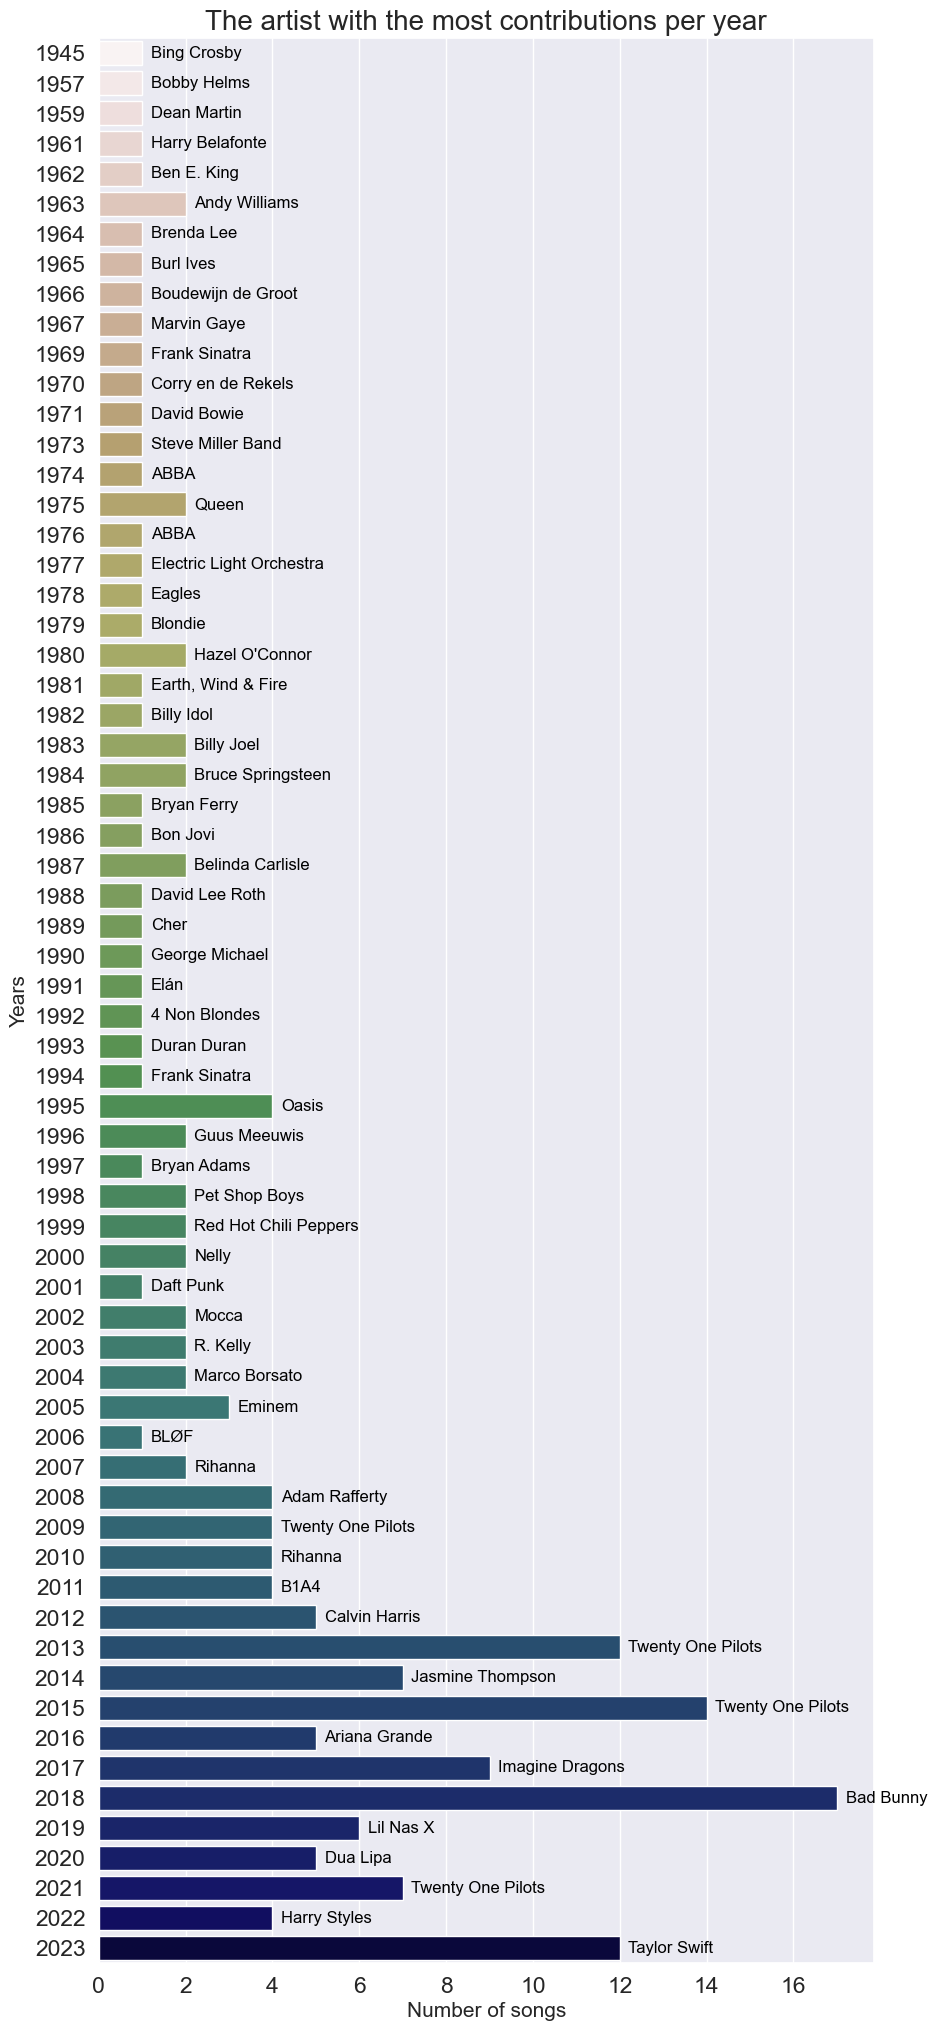

In [25]:
warnings.filterwarnings('ignore')
#visualize
ax = plt.figure(figsize=(10,25))
plot =  sns.barplot(x="count", y="release_year", data= billboard, palette=sns.color_palette("gist_earth_r", 64))
ax = plt.gca()
artist = billboard.artist.to_list()
i = 0
for p in ax.patches:
    ax.text(p.get_width() + 0.2 , p.get_y() + p.get_height()/2. , artist[i], 
            fontsize=12, color='black', ha='left', va='center')
    i+=1

plt.title("The artist with the most contributions per year", loc = 'center', fontsize = 20)
plt.xlabel("Number of songs",fontsize =15)
plt.ylabel("Years", fontsize = 15)


### QUESTION: WHICH MONTH IS BEST FOR A NEW SONG RELEASE?

<p align="center" style="font-size:15px;">
  <strong>Why we need to answer this question?</strong>
</p>

**Answer this question will help us**: 
Choosing the best month for a new song release can help increase visibility. Certain months may provide more opportunities for media and publicity. During peak months, coordinating with industry events, award shows, or music festivals can help to boost promotional efforts. Chart performance can be influenced by timing. Releasing a song in a month with less competition may help it climb the charts and perform well overall.The month in which a song is released can have a long-term impact on its success, influencing its longevity and enduring popularity.In summary, determining the best month for a new song release provides a number of benefits, ranging from improving visibility and strategic planning to capitalizing on seasonal relevance and increasing media and public engagement.dia and public engagement.

<p align="center" style="font-size:15px;">
  <strong>How to answer this question?</strong>
</p>

- **Step 1**: Filter `song` which have high `popularity`.
- **Step 2**: Extract `month` data from `release_date` column, using regular expression.
- **Step 3**: Group data and visualize information.

**STEP 1**

In [26]:
popular_song = df[df['popularity'] > 80]
popular_song.head(5)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,You Need To Calm Down,Lover,Taylor Swift,2019-08-23,171360,84,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,85.026,4
1,"thank u, next","thank u, next",Ariana Grande,2019-02-08,207320,82,0.717,0.22900,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4
2,EARFQUAKE,IGOR,"Tyler, The Creator",2019-05-17,190066,82,0.554,0.23000,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4
3,Lose You To Love Me,Rare,Selena Gomez,2020-01-10,206458,82,0.488,0.55600,0.343,0.000000,0.2100,-8.985,0.0436,102.819,4
4,High Hopes,Pray for the Wicked,Panic! At The Disco,2018-06-22,190946,82,0.579,0.19300,0.904,0.000000,0.0640,-2.729,0.0618,82.014,4


In [27]:
popular_song.shape

(469, 15)

**STEP 2**

In [28]:
month = popular_song['release_date'].str.extract(r'-(\d{2})-')
month.columns = ['release_month']
pd.isnull(month).sum()

release_month    11
dtype: int64

In [29]:
month = month.dropna().reset_index()
month = month.groupby(['release_month']).count().reset_index()

**STEP 3**

In [30]:
month.rename(columns = {'index':'count'}, inplace= True)
month

,release_month,count
0,01,37
1,02,9
2,03,40
3,04,29
4,05,31
5,06,48
6,07,26
7,08,41
8,09,46
9,10,61


**VISUALIZATION**

Text(0, 0.5, 'Count')

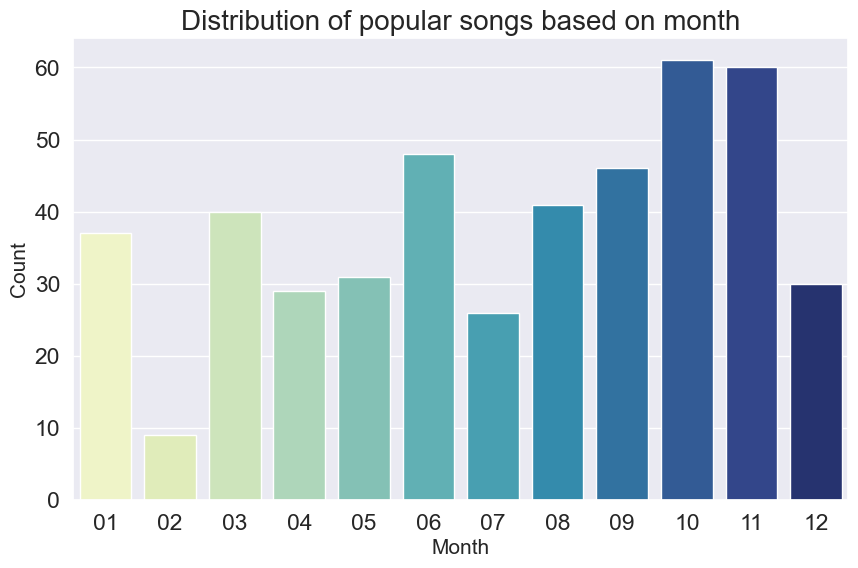

In [31]:
warnings.filterwarnings('ignore')
ax = plt.figure(figsize=(10,6))
plot =  sns.barplot(x="release_month", y= "count", data= month, palette=sns.color_palette("YlGnBu", 12))

plt.title("Distribution of popular songs based on month", loc = 'center', fontsize = 20)
plt.xlabel("Month",fontsize =15)
plt.ylabel("Count", fontsize = 15)

**INFORMATION GIVEN BY CHART**

Some possible interpretations of this chart are:

- The popularity of songs is influenced by seasonal factors, such as holidays, weather, and mood. For example, December may have more popular songs because of Christmas songs, winter songs, or songs that reflect the end of the year. January and February may have fewer popular songs because of the post-holiday slump, cold weather, or songs that are too upbeat for the winter blues.
- The popularity of songs is also affected by the release dates of new albums, singles, or music videos. For example, December may have more popular songs because of the increased marketing and promotion of new music before the holiday season. January and February may have fewer popular songs because of the lack of new music releases or the delayed response of listeners to new music.
- The popularity of songs is not evenly distributed across the year, but rather follows a cyclical pattern, with peaks and troughs. For example, December may have more popular songs because of the cumulative effect of previous months, where songs gradually gain popularity and reach their peak at the end of the year. January and February may have fewer popular songs because of the reset effect of the new year, where songs lose popularity and start from a low base.





### QUESTION: WHICH ARE SONGS WHICH HAVE SAME/NEARLY MELODY WITH A SONG?

<p align="center" style="font-size:15px;">
  <strong>Why we need to answer this question?</strong>
</p>

**Answer this question will help us**: 
   - Helps in creating diverse playlists with songs that share similar melodies. This can be particularly useful for individuals who enjoy a certain musical style and want to discover new tracks within that genre.

   - Enables music recommendation systems to provide more accurate and personalized suggestions. By identifying songs with similar melodies, recommendation algorithms can offer a more tailored music experience based on the user's preferences.

   - Helps in finding cover versions, remixes, or alternate renditions of a favorite song. This can be appealing for individuals who enjoy different interpretations of the same melody.

   - Creates a sense of nostalgia and emotional connection for listeners who enjoy a particular melody. Finding songs with similar melodies can evoke similar emotions and feelings associated with the original song.

In summary, identifying songs with similar or nearly identical melodies offers a range of benefits, from broadening musical tastes to enhancing music discovery and supporting educational endeavors in the realm of music theory and composition.

<p align="center" style="font-size:15px;">
  <strong>How to answer this question?</strong>
</p> 

Create a `matrix` to calculate **similarity_rate** between songs.


<p align="center" style="font-size:15px;">
  <strong>IMPLEMENTATION WILL BE DONE IN `recommendation_model.ipynb`</strong>
</p>

<p align="center" style="font-size:30px;">
  <strong>THANKS FOR YOUR READING <3 </strong>
</p>